# Used car price prediction


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [65]:
raw_data = pd.read_csv(r'C:\Users\Iwona\Downloads\Resources\Downloaded csv files for portfolio\cars_data\autoscout24-germany-dataset.csv\autoscout24-germany-dataset.csv')
raw_data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011


In [3]:
raw_data.describe(include = 'all')

,mileage,make,model,fuel,gear,offerType,price,hp,year
count,4.640500e+04,46405,46262,46405,46223,46405,4.640500e+04,46376.000000,46405.000000
unique,NaN,77,841,11,3,5,NaN,NaN,NaN
top,NaN,Volkswagen,Golf,Gasoline,Manual,Used,NaN,NaN,NaN
freq,NaN,6931,1492,28864,30380,40122,NaN,NaN,NaN
mean,7.117786e+04,NaN,NaN,NaN,NaN,NaN,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,NaN,NaN,NaN,NaN,NaN,1.930470e+04,75.449284,3.155214
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,NaN,NaN,NaN,NaN,NaN,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,NaN,NaN,NaN,NaN,NaN,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,NaN,NaN,NaN,NaN,NaN,1.949000e+04,150.000000,2019.000000


In [4]:
# Suppressing the scientific notation 
raw_data.describe().apply(lambda s: s.apply('{0:.5f}'.format)) 

,mileage,price,hp,year
count,46405.00000,46405.00000,46376.00000,46405.00000
mean,71177.86411,16572.33723,132.99099,2016.01295
std,62625.30846,19304.69592,75.44928,3.15521
min,0.00000,1100.00000,1.00000,2011.00000
25%,19800.00000,7490.00000,86.00000,2013.00000
50%,60000.00000,10999.00000,116.00000,2016.00000
75%,105000.00000,19490.00000,150.00000,2019.00000
max,1111111.00000,1199900.00000,850.00000,2021.00000


In [5]:
# There are 841 unique values in model column, I'll simply drop it
data = raw_data.drop(['model'],axis=1)

In [6]:
data.isnull().sum()

mileage        0
make           0
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [7]:
# Dropping all missing values
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.isnull().sum()

mileage      0
make         0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

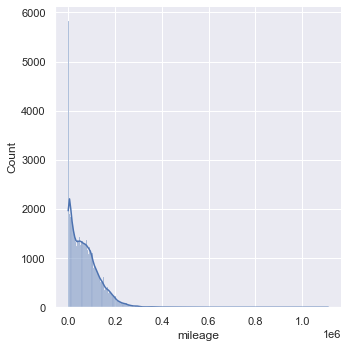

In [9]:
# Probability distribution function (PDF) show us how the variable is distributed which makes it very easy to spot anomalies
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.displot(data['mileage'],kde = True)

### Dealing with outliers

In [10]:
# Obviously there are some outliers present 
# The easiest way is to remove 0.5%-1% of the problematic samples
# This is a dataset about used cars, therefore owe can tell that $1199900 is an excessive price
q = data_no_mv['mileage'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['mileage']<q]


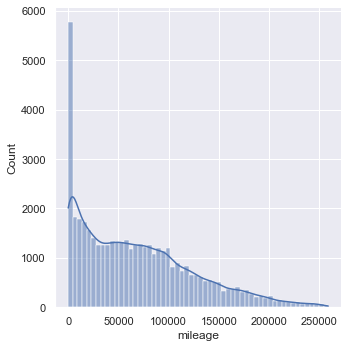

In [11]:
sns.displot(data_1['mileage'],kde=True)

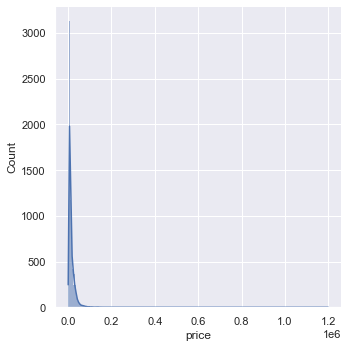

In [12]:
sns.displot(data_no_mv['price'],kde=True)

In [13]:
q = data_1['price'].quantile(0.99)
data_2 = data_1[data_1['price']<q]

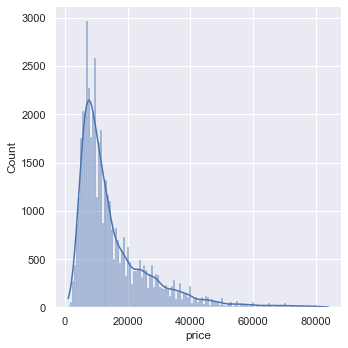

In [14]:
sns.displot(data_2['price'], kde=True)

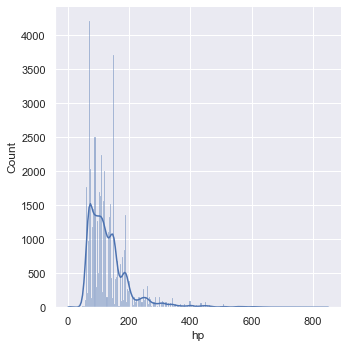

In [15]:
sns.displot(data_no_mv['hp'],kde=True)

In [16]:
q = data_2['hp'].quantile(0.99)
data_3 = data_2[data_2['hp']<q]

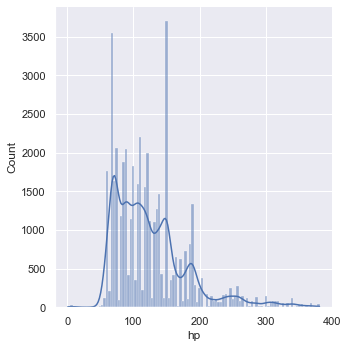

In [17]:
sns.displot(data_3['hp'], kde=True)

In [18]:
data_cleaned = data_3.reset_index(drop=True)

In [19]:
data_cleaned.describe(include='all')

,mileage,make,fuel,gear,offerType,price,hp,year
count,44820.000000,44820,44820,44820,44820,44820.000000,44820.000000,44820.000000
unique,NaN,62,11,3,5,NaN,NaN,NaN
top,NaN,Volkswagen,Gasoline,Manual,Used,NaN,NaN,NaN
freq,NaN,6798,28112,30088,38792,NaN,NaN,NaN
mean,69358.840763,NaN,NaN,NaN,NaN,15013.170660,125.959304,2016.002253
std,57106.716641,NaN,NaN,NaN,NaN,11284.372274,56.142580,3.146493
min,0.000000,NaN,NaN,NaN,NaN,1100.000000,1.000000,2011.000000
25%,20000.000000,NaN,NaN,NaN,NaN,7490.000000,86.000000,2013.000000
50%,60000.000000,NaN,NaN,NaN,NaN,10990.000000,116.000000,2016.000000
75%,104000.000000,NaN,NaN,NaN,NaN,18881.250000,150.000000,2019.000000


### Checking the OLS assumptions

Text(0.5, 1.0, 'Price and Mileage')

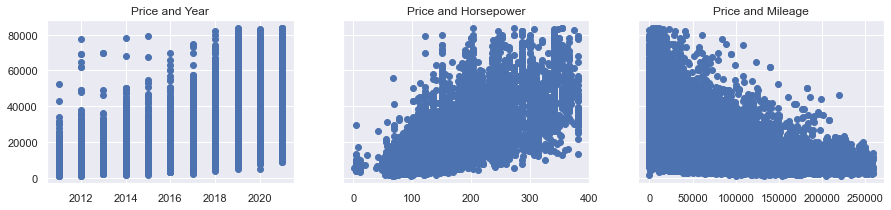

In [20]:
# Plotting variables to compare them
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) # sharey -> share 'price' as y
ax1.scatter(data_cleaned['year'],data_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['hp'],data_cleaned['price'])
ax2.set_title('Price and Horsepower')
ax3.scatter(data_cleaned['mileage'],data_cleaned['price'])
ax3.set_title('Price and Mileage')

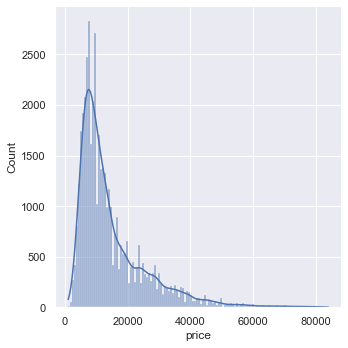

In [21]:
# It is viasable that 'Price' is exponentially distributed so a good transformation in that case is a log transformation
sns.displot(data_cleaned['price'], kde=True)

### Relaxing the assumptions

In [22]:
# Transforming 'price' with a log transformation
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price
data_cleaned

,mileage,make,fuel,gear,offerType,price,hp,year,log_price
0,235000,BMW,Diesel,Manual,Used,6800,116.0,2011,8.824678
1,92800,Volkswagen,Gasoline,Manual,Used,6877,122.0,2011,8.835938
2,149300,SEAT,Gasoline,Manual,Used,6900,160.0,2011,8.839277
3,96200,Renault,Gasoline,Manual,Used,6950,110.0,2011,8.846497
4,156000,Peugeot,Gasoline,Manual,Used,6950,156.0,2011,8.846497
...,...,...,...,...,...,...,...,...,...
44815,99,Fiat,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,9.471935
44816,99,Fiat,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,9.471935
44817,99,Fiat,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,9.471935
44818,99,Fiat,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,9.471935


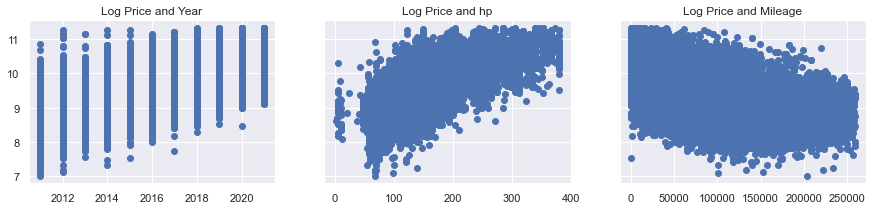

In [23]:
# Checking the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['hp'],data_cleaned['log_price'])
ax2.set_title('Log Price and hp')
ax3.scatter(data_cleaned['mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [24]:
# Since I will be using the log price variable, I can drop the old 'price'
data_cleaned = data_cleaned.drop(['price'],axis=1)

### Checking for multicollinearity

In [25]:
data_cleaned.columns.values

array(['mileage', 'make', 'fuel', 'gear', 'offerType', 'hp', 'year',
       'log_price'], dtype=object)

In [26]:
# It is obvious that 'year' and 'mileage' go together so we can expect some multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['mileage','year','hp']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [27]:
vif

,VIF,Features
0,2.473497,mileage
1,7.277390,year
2,6.052263,hp


In [28]:
# Generally VIF is considered ok  with values between 1-5
# Since 'year' has the highest VIF, I will remove it from the model
# This will lower the VIF of other variables down
data_no_multicollinearity = data_cleaned.drop(['year'],axis=1)

### Dealing with categorical variables. 

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,mileage,hp,log_price,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Audi,make_BMW,...,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,116.0,8.824678,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,92800,122.0,8.835938,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,149300,160.0,8.839277,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,96200,110.0,8.846497,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,156000,156.0,8.846497,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [30]:
data_with_dummies.columns.values

array(['mileage', 'hp', 'log_price', 'make_Abarth', 'make_Aixam',
       'make_Alfa', 'make_Alpina', 'make_Alpine', 'make_Audi', 'make_BMW',
       'make_Baic', 'make_Brilliance', 'make_Cadillac',
       'make_Caravans-Wohnm', 'make_Chevrolet', 'make_Chrysler',
       'make_Citroen', 'make_Cupra', 'make_DFSK', 'make_DS', 'make_Dacia',
       'make_Daihatsu', 'make_Dodge', 'make_Estrima', 'make_Fiat',
       'make_Ford', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Isuzu', 'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia',
       'make_Lada', 'make_Lancia', 'make_Land', 'make_Lexus',
       'make_Ligier', 'make_MINI', 'make_Maserati', 'make_Mazda',
       'make_Mercedes-Benz', 'make_Microcar', 'make_Mitsubishi',
       'make_Morgan', 'make_Nissan', 'make_Opel', 'make_Others',
       'make_Peugeot', 'make_Piaggio', 'make_Porsche', 'make_Renault',
       'make_SEAT', 'make_Skoda', 'make_SsangYong', 'make_Subaru',
       'make_Suzuki', 'make_Tesla', 'make_Toyota', 'make_V

In [31]:
# Rearranging a bit.
cols = ['log_price','mileage', 'hp', 'make_Abarth', 'make_Aixam',
       'make_Alfa', 'make_Alpina', 'make_Alpine', 'make_Audi', 'make_BMW',
       'make_Baic', 'make_Brilliance', 'make_Cadillac',
       'make_Caravans-Wohnm', 'make_Chevrolet', 'make_Chrysler',
       'make_Citroen', 'make_Cupra', 'make_DFSK', 'make_DS', 'make_Dacia',
       'make_Daihatsu', 'make_Dodge', 'make_Estrima', 'make_Fiat',
       'make_Ford', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Isuzu', 'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia',
       'make_Lada', 'make_Lancia', 'make_Land', 'make_Lexus',
       'make_Ligier', 'make_MINI', 'make_Maserati', 'make_Mazda',
       'make_Mercedes-Benz', 'make_Microcar', 'make_Mitsubishi',
       'make_Morgan', 'make_Nissan', 'make_Opel', 'make_Others',
       'make_Peugeot', 'make_Piaggio', 'make_Porsche', 'make_Renault',
       'make_SEAT', 'make_Skoda', 'make_SsangYong', 'make_Subaru',
       'make_Suzuki', 'make_Tesla', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo', 'make_Zhidou', 'make_smart', 'fuel_CNG',
       'fuel_Diesel', 'fuel_Electric', 'fuel_Electric/Diesel',
       'fuel_Electric/Gasoline', 'fuel_Ethanol', 'fuel_Gasoline',
       'fuel_Hydrogen', 'fuel_LPG', 'fuel_Others', 'gear_Manual',
       'gear_Semi-automatic', "offerType_Employee's car", 'offerType_New',
       'offerType_Pre-registered', 'offerType_Used']

In [32]:
data_with_dummies.columns.values

array(['mileage', 'hp', 'log_price', 'make_Abarth', 'make_Aixam',
       'make_Alfa', 'make_Alpina', 'make_Alpine', 'make_Audi', 'make_BMW',
       'make_Baic', 'make_Brilliance', 'make_Cadillac',
       'make_Caravans-Wohnm', 'make_Chevrolet', 'make_Chrysler',
       'make_Citroen', 'make_Cupra', 'make_DFSK', 'make_DS', 'make_Dacia',
       'make_Daihatsu', 'make_Dodge', 'make_Estrima', 'make_Fiat',
       'make_Ford', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Isuzu', 'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia',
       'make_Lada', 'make_Lancia', 'make_Land', 'make_Lexus',
       'make_Ligier', 'make_MINI', 'make_Maserati', 'make_Mazda',
       'make_Mercedes-Benz', 'make_Microcar', 'make_Mitsubishi',
       'make_Morgan', 'make_Nissan', 'make_Opel', 'make_Others',
       'make_Peugeot', 'make_Piaggio', 'make_Porsche', 'make_Renault',
       'make_SEAT', 'make_Skoda', 'make_SsangYong', 'make_Subaru',
       'make_Suzuki', 'make_Tesla', 'make_Toyota', 'make_V

In [33]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,mileage,hp,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Audi,make_BMW,...,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,8.824678,235000,116.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,8.835938,92800,122.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,8.839277,149300,160.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,8.846497,96200,110.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,8.846497,156000,156.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


### Linear regression model

In [34]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [35]:
# It is not recomended to standardize dummy variables, 
# but here I won't pay much attention to it as scaling has no effect on the predictive power of dummies

In [36]:
# Importing the scaling module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=1)

### Creating the regression

In [39]:
reg = LinearRegression()
# Fitfing the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

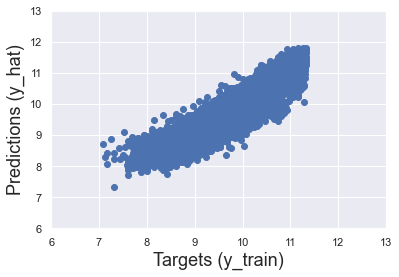

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

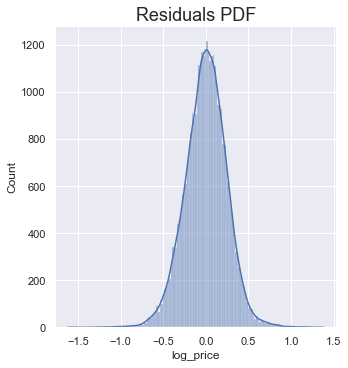

In [42]:
# Plotting the PDF of the residuals and check for anomalies
sns.displot((y_train - y_hat),kde=True)
plt.title("Residuals PDF", size=18)

In [43]:
reg.score(x_train,y_train)

0.8569205410631396

### Finding the weights and bias

In [44]:
# The bias (intercept) of the regression
reg.intercept_

9.394209861060558

In [45]:
# The weights (coefficients) of the regression
reg.coef_


array([-3.50742005e-01,  3.27994502e-01, -2.93896527e-03, -1.37407443e-03,
       -6.57466871e-03, -2.64221439e-03,  3.16107009e-03,  2.74601428e-02,
        4.42806136e-03,  2.60478394e-04, -8.21432578e-03, -2.29127724e-04,
        3.36169429e-03, -3.77785326e-02, -4.15189606e-03, -3.10388180e-02,
       -1.17032443e-02, -2.38095973e-04,  1.18707275e-03, -2.60456633e-02,
       -6.25649354e-03, -7.33172036e-03,  1.46530670e-03, -3.54530200e-02,
       -2.77833738e-02, -3.71122214e-03, -3.48859060e-02, -8.62241089e-04,
       -5.11530665e-04, -2.11143007e-03, -3.87607357e-03, -2.44598336e-03,
       -2.54708170e-02, -6.41532873e-03, -7.40869370e-03,  1.02348116e-02,
       -3.99828789e-04, -1.04125642e-03,  2.09181207e-03, -1.02504728e-03,
       -3.32794780e-03,  3.07580790e-02, -5.70060311e-03, -2.33766768e-02,
        7.50116234e-03, -1.85468540e-02, -4.35922361e-02, -9.04722996e-03,
       -3.44563710e-02,  2.92028670e-04,  1.17629141e-02, -5.30912015e-02,
       -1.90351306e-02, -

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,mileage,-0.350742
1,hp,0.327995
2,make_Abarth,-0.002939
3,make_Aixam,-0.001374
4,make_Alfa,-0.006575
...,...,...
74,gear_Semi-automatic,-0.008157
75,offerType_Employee's car,-0.014142
76,offerType_New,0.001789
77,offerType_Pre-registered,-0.005390


In [47]:
data_cleaned['make'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Chevrolet', 'Audi', 'Fiat', 'Kia',
       'Dacia', 'MINI', 'Mercedes-Benz', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Others',
       'Lexus', 'Jeep', 'Land', 'Alfa', 'Subaru', 'Microcar', 'Baic',
       'Lada', 'Chrysler', '9ff', 'Lancia', 'Abarth', 'DS', 'Daihatsu',
       'Maserati', 'Ligier', 'Caravans-Wohnm', 'Aixam', 'Alpine',
       'Zhidou', 'Morgan', 'Tesla', 'Dodge', 'Brilliance', 'Piaggio',
       'Alpina', 'Cadillac', 'Iveco', 'Isuzu', 'DFSK', 'Estrima'],
      dtype=object)

In [48]:
data_cleaned['gear'].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [49]:
data_cleaned['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'LPG', 'CNG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

### Testing

In [50]:
y_hat_test = reg.predict(x_test)

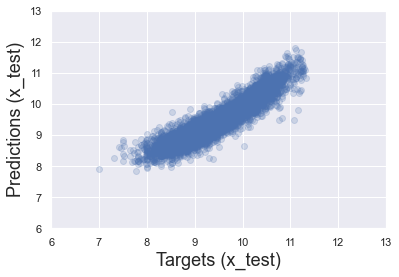

In [51]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (x_test)',size=18)
plt.ylabel('Predictions (x_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
# To obtain the actual prices,I take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,6125.705582
1,21638.059381
2,4573.338796
3,8238.602926
4,8942.447195


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6125.705582,NaN
1,21638.059381,NaN
2,4573.338796,NaN
3,8238.602926,6950.0
4,8942.447195,NaN
...,...,...
8959,5150.517540,NaN
8960,19290.428709,NaN
8961,21681.506318,11590.0
8962,8006.683167,NaN


In [54]:
y_test

5303      8.573574
44415     9.850983
35783     8.496990
13213     9.303831
36280     9.099409
           ...    
30113     8.213382
27316    10.239924
4003     10.180740
39684     8.985946
43609    10.083724
Name: log_price, Length: 8964, dtype: float64

In [55]:
# Resetting the indexes
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.573574
1    9.850983
2    8.496990
3    9.303831
4    9.099409
Name: log_price, dtype: float64

In [56]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6125.705582,5290.0
1,21638.059381,18977.0
2,4573.338796,4900.0
3,8238.602926,10980.0
4,8942.447195,8950.0
...,...,...
8959,5150.517540,3690.0
8960,19290.428709,27999.0
8961,21681.506318,26390.0
8962,8006.683167,7990.0


In [57]:
# Once obtaining predictions and the targets I can compare them.
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [58]:
# Adding difference in % to make it easy evaluate the outputs and the targets 
# displaying as absolute value.
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6125.705582,5290.0,-835.705582,15.797837
1,21638.059381,18977.0,-2661.059381,14.022550
2,4573.338796,4900.0,326.661204,6.666555
3,8238.602926,10980.0,2741.397074,24.967186
4,8942.447195,8950.0,7.552805,0.084389
...,...,...,...,...
8959,5150.517540,3690.0,-1460.517540,39.580421
8960,19290.428709,27999.0,8708.571291,31.103151
8961,21681.506318,26390.0,4708.493682,17.841962
8962,8006.683167,7990.0,-16.683167,0.208801


In [59]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,8964.000000,8964.000000,8964.000000,8964.000000
mean,14711.018225,15008.377510,297.359285,19.592940
std,11757.047053,11394.611103,4891.695625,18.747538
min,2513.204123,1100.000000,-65902.413842,0.000324
25%,7746.702187,7490.000000,-1434.737620,7.150724
50%,10668.338547,10990.000000,75.298439,15.294710
75%,16805.691320,18858.750000,2009.634646,26.616026
max,131802.413842,83870.000000,51946.867836,281.851452


Text(0.5, 0, 'Index')

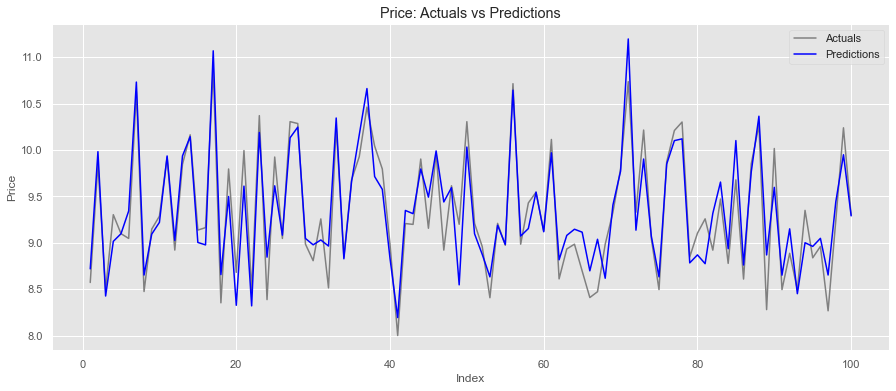

In [107]:
#Actual vs Predicted of the first 100 values 

plt.style.use('ggplot')
section = [i for i in range(1,101,1)]
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x = section , y = y_test[:100], label='Actuals', color='gray', ax=ax)
sns.lineplot(x = section , y = y_hat_test[:100], label='Predictions', color='blue', ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [111]:
# It is useful to sort the values by "Difference %" to make it easier to spot good and bad predictions.
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
3149,23900.08,23900.00,-0.08,0.00
8841,9789.75,9790.00,0.25,0.00
3021,6449.40,6450.00,0.60,0.01
2142,27437.16,27440.00,2.84,0.01
836,7390.86,7390.00,-0.86,0.01
...,...,...,...,...
8797,5625.09,1850.00,-3775.09,204.06
6349,5531.28,1650.00,-3881.28,235.23
5406,16848.79,4999.00,-11849.79,237.04
1042,6385.92,1800.00,-4585.92,254.77
